<a href="https://colab.research.google.com/github/amina200003/Biogpt_QA/blob/main/bar_plot_biogpt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
from collections import Counter
import matplotlib.pyplot as plt


In [1]:
!jupyter nbconvert --ClearOutputPreprocessor.enabled=True --inplace bar_plot_biogpt.ipynb


[NbConvertApp] WARNING | pattern 'bar_plot_biogpt.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute

In [ ]:

def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i])

In [ ]:
def hist(input_file,title,output_file):
    with open(input_file, "r", encoding="utf-8") as f:
      file_j= json.load(f)

    bias=[dico["label"] for dico in file_j]


    freq= Counter()
    freq.update(bias)
    val= freq.values()

    labels = ["correct",'omission bias',"out of topic","overconfidence bias","false","confirmation bias"]
    for elt in labels:
        if elt not in freq:
            freq.update({elt: 0})
    print(freq)

    plt.bar(labels, val, color=['blue', 'green', 'red','orange','yellow','purple'])
    add_labels(labels,list(val))

    plt.xlabel("Types de biais cognitifs")
    plt.ylabel("Valeurs")
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.savefig(output_file)
    plt.show()


def hist_all(paths,titles,outputs):
     for i in range(len(paths)):
         hist(paths[i],titles[i],outputs[i])

Counter({'out of topic': 66, 'omission bias': 65, 'false': 28, 'correct': 26, 'confirmation bias': 8, 'overconfidence bias': 6})


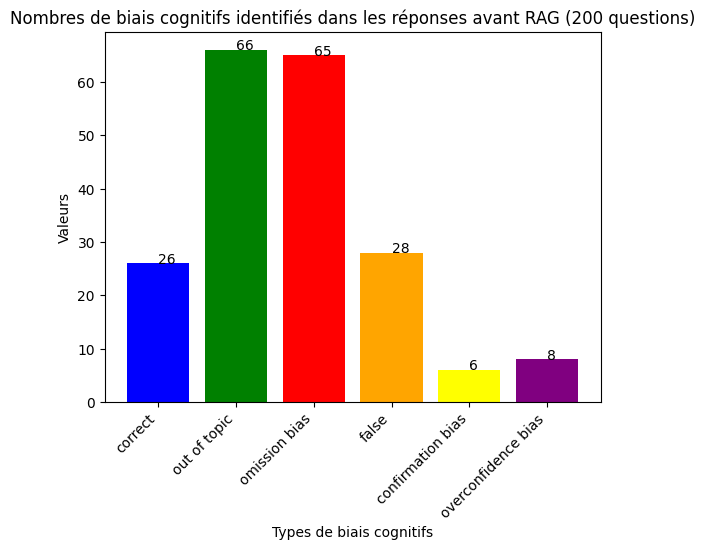

In [ ]:
hist("biogpt_answer_classified.json","Nombres de biais cognitifs identifiés dans les réponses avant RAG (200 questions)","bar_plot_NoRAG_officiel.jpg")

Counter({'correct': 82, 'omission bias': 43, 'out of topic': 39, 'overconfidence bias': 35, 'false': 0, 'confirmation bias': 0})


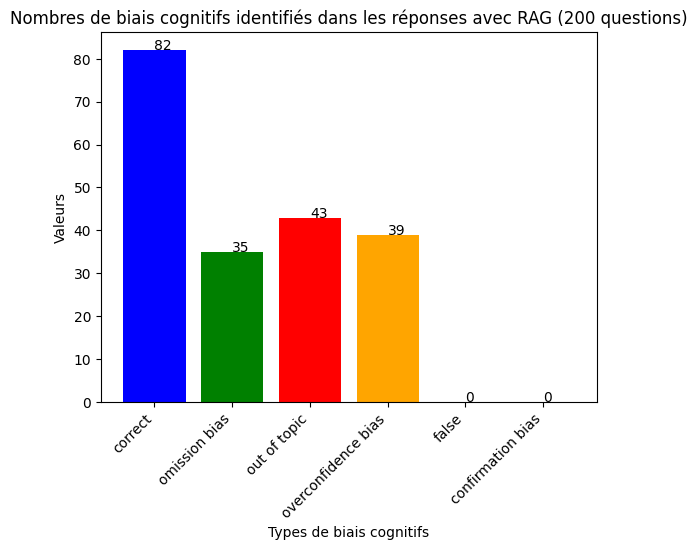

In [ ]:
hist("biogpt_RAG_mergedata_chunking_hybrid_retriever_labeled_strict.json","Nombres de biais cognitifs identifiés dans les réponses avec RAG (200 questions)","bar_plot_RAG_officiel.jpg")

Counter({'correct': 169, 'overconfidence bias': 16, 'out of topic': 8, 'omission bias': 6, 'false': 0, 'confirmation bias': 0})


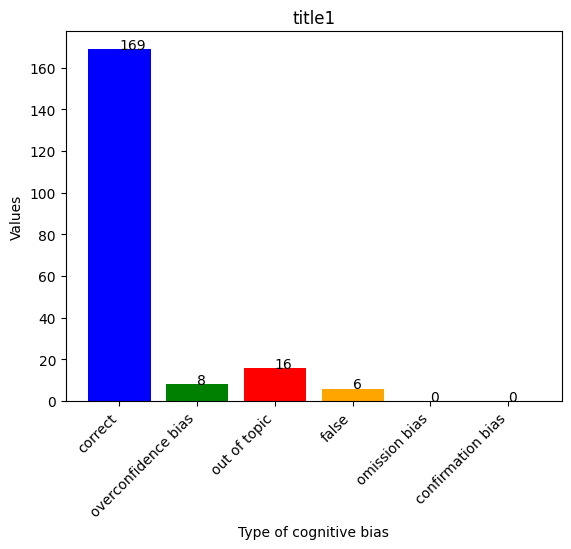

Counter({'correct': 167, 'overconfidence bias': 22, 'out of topic': 7, 'omission bias': 3, 'false': 0, 'confirmation bias': 0})


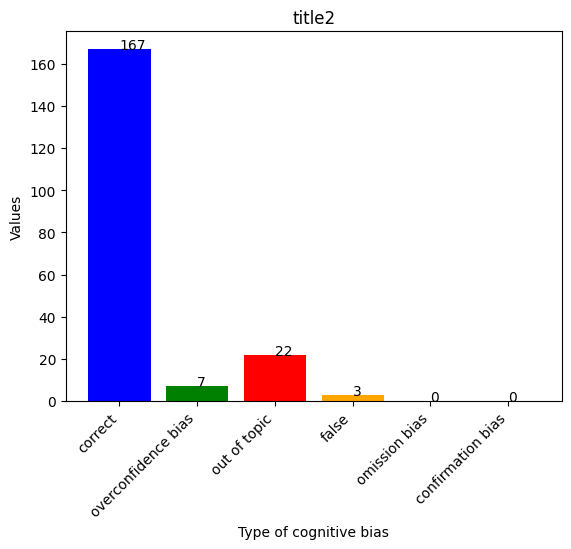

Counter({'correct': 168, 'overconfidence bias': 15, 'out of topic': 12, 'false': 3, 'omission bias': 1, 'confirmation bias': 0})


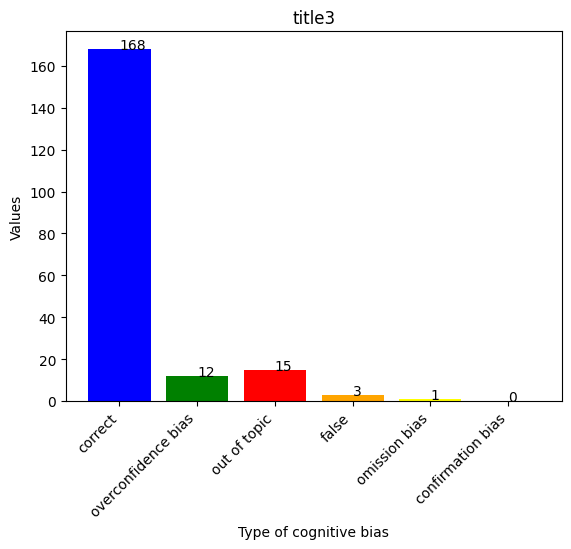

In [ ]:
paths= ["biogpt_RAG_mergedata_chunking_hybrid_retriever_labeled_strict.json","biogpt_RAG_result_mergeData_reranker_labeled_strict.json","biogpt_RAG_simple_mergedata_labeled_strict.json"]
titles= ["title1","title2","title3"]
outputs= ["output1.jpg","output2.jpg","output3.jpg"]


hist_all(paths,titles,outputs)
